# 📊 In-Class Exercise: Sampling & Inference for Financial Data

In this exercise, you'll simulate sampling, compute confidence intervals, and perform hypothesis testing using Python. The dataset simulates daily returns for a financial index.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [3]:
np.random.seed(42)  # For reproducibility
population = np.random.normal(loc=0.05, scale=0.02 , size=1000)  # Normal distribution
df_population = pd.DataFrame({'Return':population})
df_population.head()

,Return
0,0.059934
1,0.047235
2,0.062954
3,0.080461
4,0.045317


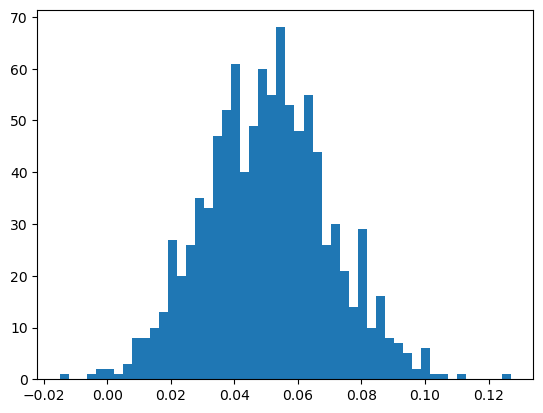

In [5]:
plt.hist(df_population['Return'], bins=50)
plt.show()

## 🔹 Part A: Distribution of Sample Means
**Task:** Draw 100 random samples (size=30), calculate sample means, and plot their distribution.

In [8]:
sample_means = []
for i in range(1000):
    pop_sample = df_population.sample(n=30, replace=False)
    sample_means.append(pop_sample['Return'].mean())

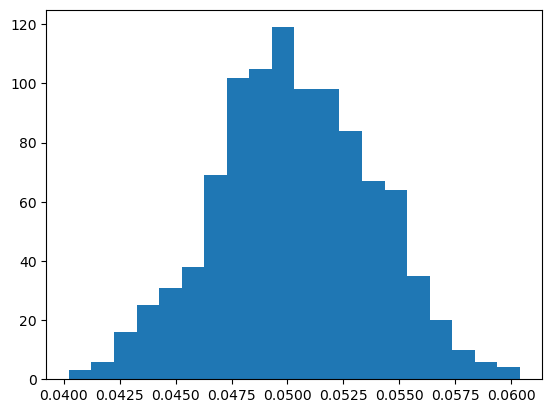

In [10]:
plt.hist(sample_means, bins=20)
plt.show()

In [7]:
pop_sample

,Return
521,0.060867
737,0.069654
740,0.013183
660,0.038527
411,0.027507
...,...
436,0.082572
764,0.072985
88,0.039405
63,0.026076


**Q: What is the shape of the histogram?**
**Q: What does this tell you about the Central Limit Theorem?**

## 🔹 Part B: Confidence Interval for the Mean
**Task:** Take one sample (size=50), calculate the 95% confidence interval for the population mean.

In [48]:
conf_sample1 = df_population.sample(n=50, replace=False)
conf_sample_mean = conf_sample1['Return'].mean()
std = 0.02
n = 50

std_error = std / np.sqrt(n)
z_value = norm.ppf(0.95)  # 95% confidence interval


lower_b = conf_sample_mean - z_value * std_error
upper_b = conf_sample_mean + z_value * std_error
conf_interval = (lower_b, upper_b)
conf_interval

(0.04027858837680906, 0.04958328560622245)

**Q: Does your confidence interval contain the true population mean (0.05)?**
**Q: What happens if you increase the sample size to 200? Try it.**

In [ ]:
# conf_sample = df_population.sample(n=200, replace=False)
# conf_sample_mean = conf_sample['Return'].mean()
# conf_sample_std = conf_sample['Return'].std()

# conf_interval = norm.interval(0.95, loc=conf_sample_mean, scale=conf_sample_std/np.sqrt(200))
# conf_interval



(0.04822116245068484, 0.053108047830977355)

## 🔹 Part C: Hypothesis Testing
**Claim:** The mean daily return is greater than 0.04.

Perform a one-sample z-test using the sample from Part B.

In [50]:
# Null mean <= 0.04
# Alternative mean > 0.04
null_mean = 0.04
alternative_mean = 0.05
z_score = (conf_sample_mean - null_mean) / std_error
p_value = 1 - norm.cdf(z_score)
print(f"Z-score: {z_score}, P-value: {p_value}")

Z-score: 1.7433494921521921, P-value: 0.04063629255805057


In [ ]:
#Null is rejected because the p-value is less than 0.05, indicating that the sample mean is significantly greater than the null hypothesis mean of 0.04.

**Q: Should you reject the null hypothesis at α = 0.05? Why or why not?**

## ✅ Wrap-Up Reflection
- What did you learn about sample size and reliability?
- How do confidence intervals help in financial analysis?
- What are the risks of making decisions from one sample?